# Sport Vouchers Program Analysis

The goal of this Portfolio task is to explore data from the Federal Government Sport Vouchers program - this is a
program that provides up to two $100 vouchers for kids to participate in organised sport. Here's the [NSW Active Kids page](https://www.service.nsw.gov.au/transaction/apply-active-kids-voucher), there are similar schemes in other states - this data is from South Australia.

This is an exercise in exploring data and communicating the insights you can gain from it.  The source data comes
from the `data.gov.au` website and provides details of all Sport Vouchers that have been redeemed since February  in SA 2015 as part of the Sport Voucher program:  [Sports Vouchers Data](https://data.gov.au/dataset/ds-sa-14daba50-04ff-46c6-8468-9fa593b9f100/details).  This download is provided for you as `sportsvouchersclaimed.csv`.

To augment this data you can also make use of [ABS SEIFA data by LGA](http://stat.data.abs.gov.au/Index.aspx?DataSetCode=ABS_SEIFA_LGA#) which shows a few measures of Socioeconomic Advantage and Disadvantage for every Local Government Area. This data is provided for you as `ABS_SEIFA_LGA.csv`. This could enable you to answer questions about whether the voucher program is used equally by parents in low, middle and high socioeconomic areas.   You might be interested in this if you were concerned that this kind of program might just benifit parents who are already advantaged (they might already be paying for sport so this program wouldn't be helping much).

Questions:
* Describe the distribution of vouchers by: LGA, Sport - which regions/sports stand out? 
* Are some sports more popular in different parts of the state?
* Are any LGAs over/under represented in their use of vouchers?
* Is there a relationship between any of the SEIFA measures and voucher use in an LGA?

A challenge in this task is to display a useful summary of the data given that there are a large number of LGAs and sports involved.  Try to avoid long lists and large tables. Think about what plots and tables communicate the main points of your findings. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read the sports vouchers data
sa_vouchers = pd.read_csv("files/sportsvouchersclaimed.csv")
sa_vouchers.head()

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year
0,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,26/6/15 1:19,2015
1,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,29/6/16 23:55,2016
2,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,21/4/16 3:37,2016
3,1000004,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,30/3/17 0:47,2017
4,1000005,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Blackwood Community Recreation Association,Gymnastics,ONKAPARINGA,FISHER,20/7/15 2:50,2015


The SEIFA data includes row for each Local Government Area (LGA) but the names of the LGAs have a letter or letters in brackets after the name.  To allow us to match this up with the voucher data we remove this and convert to uppercase. 

For each LGA the data includes a number of measures all of which could be useful in your exploration.  

In [3]:
# read the SEIFA data, create an LGA column by removing the letters in brackets and converting to uppercase
seifa = pd.read_csv('files/ABS_SEIFA_LGA.csv')
lga = seifa["Local Government Areas - 2011"].str.replace(' \([ACSRCDMT]+\)', '').str.upper()
seifa['LGA'] = lga
seifa.head()

<ipython-input-3-8c32cb05a179>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  lga = seifa["Local Government Areas - 2011"].str.replace(' \([ACSRCDMT]+\)', '').str.upper()


,LGA_2011,Local Government Areas - 2011,INDEX_TYPE,Index Type,MEASURE,Measure,Value,LGA
0,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,967,ALBURY
1,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MINS,Minimum score for SA1s in area,628,ALBURY
2,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MAXS,Maximum score for SA1s in area,1169,ALBURY
3,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,URP,Usual resident population,47851,ALBURY
4,10110,Armidale Dumaresq (A),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,985,ARMIDALE DUMARESQ


Since there are many rows per LGA we need to use `pivot_table` to create a new data frame with one row per LGA. Here
is an example of doing this to create a table with the different SCORE measures and the population (URP) field. 

In [9]:
LGA_scores = seifa[seifa.MEASURE == 'SCORE'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_scores.head()
LGA_pop = seifa[seifa.MEASURE == 'URP'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_pop.head()
#LGA_scores['Population'] = LGA_pop.IEO
#LGA_scores.head()

INDEX_TYPE,IEO,IER,IRSAD,IRSD
LGA,,,,
ADELAIDE,19606.0,19606.0,19606.0,19606.0
ADELAIDE HILLS,38601.0,38601.0,38601.0,38601.0
ALBANY,33614.0,33614.0,33614.0,33614.0
ALBURY,47851.0,47851.0,47851.0,47851.0
ALEXANDRINA,23693.0,23693.0,23693.0,23693.0


This data frame can then be joined with the vouchers data fram to create one master data frame containing both the voucher data and the SEIFA measures.

In [5]:
sa_vouchers_scores = sa_vouchers.join(LGA_scores, on='Participant_LGA')
sa_vouchers_scores.head()

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year,IEO,IER,IRSAD,IRSD,Population
0,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,26/6/15 1:19,2015,996.0,996.0,975.0,993.0,159517.0
1,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,29/6/16 23:55,2016,996.0,996.0,975.0,993.0,159517.0
2,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,21/4/16 3:37,2016,996.0,996.0,975.0,993.0,159517.0
3,1000004,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,30/3/17 0:47,2017,996.0,996.0,975.0,993.0,159517.0
4,1000005,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Blackwood Community Recreation Association,Gymnastics,ONKAPARINGA,FISHER,20/7/15 2:50,2015,996.0,996.0,975.0,993.0,159517.0


### Description of The Distribution of Vouchers

In [12]:
# Check the number of rows and columns of the Sport Vouchers dataset
sa_vouchers.shape

(127526, 13)

In [14]:
# Statistical summary of the Voucher values
sa_vouchers['Voucher_Value'].describe()

count    127526.000000
mean         49.663951
std           2.700970
min           5.000000
25%          50.000000
50%          50.000000
75%          50.000000
max          50.000000
Name: Voucher_Value, dtype: float64

In [10]:
# Counts the total participants in each LGA
sa_vouchers['Participant_LGA'].value_counts()

ONKAPARINGA          12782
SALISBURY             8169
TEA TREE GULLY        7219
PLAYFORD              6940
CHARLES STURT         6897
                     ...  
FRANKLIN HARBOUR       155
ORROROO/CARRIETON      137
FLINDERS RANGES        102
PETERBOROUGH            45
COOBER PEDY             39
Name: Participant_LGA, Length: 69, dtype: int64

In [11]:
# Count the uses of vouchers on each sport
sa_vouchers['Voucher_Sport'].value_counts()

Australian Rules     47224
Netball              24017
Football (Soccer)    15775
Gymnastics            9823
Basketball            6016
Athletics             4518
Tennis                3742
Hockey                3026
Calisthenics          2522
Cricket               1875
Surf Lifesaving       1442
Swimming              1204
Taekwondo              910
Baseball               865
Rugby Union            734
Lacrosse               656
Softball               548
Rugby League           270
Equestrian             265
Squash                 249
Judo                   210
Golf                   188
Table Tennis           166
BMX                    157
Roller Sports          148
Cycling                105
Motorcycling            97
Karate                  91
Diving                  89
Ice Skating             86
Fencing                 84
Volleyball              62
Orienteering            56
Water Polo              48
Motor Sport             45
Sailing                 40
Archery                 34
T

* **_Interpretation about Which LGA and Sports stand out:_**

From the summary of values in LGAs and sports above, it is clear to see that Onkaparinga, Salisbury, and Tea Tree Gully are the three LGAs which used the most sport vouchers. Particularly, 12782 participants who reside in Onkaparinga used vouchers to reduce cost of sport participations, which ranks first in the dataset. On the other hand, the most three popular sport activities which participants use the vouchers for are Australian Rules, Netball, and Football(Soccer). The Australian Rules ranks first in the dataset, which is up to 47224 participants undertaking this activity with the vouchers. 

#### Comparison of Popular Sports between The Three Standout LGAs

In [64]:
# Create three new dataframes which contain the three LGAs and the total number of participated sports
lga_sport = sa_vouchers[['Participant_LGA','Voucher_Sport']] # dataframe only includes LGA and Sport
lga_sport.head()

first_lga = lga_sport[lga_sport.Participant_LGA == 'ONKAPARINGA']
first_total = first_lga['Voucher_Sport'].value_counts().rename_axis('sports').reset_index(name='counts')

second_lga = lga_sport[lga_sport.Participant_LGA == 'SALISBURY']
second_total = second_lga['Voucher_Sport'].value_counts().rename_axis('sports').reset_index(name='counts')

third_lga = lga_sport[lga_sport.Participant_LGA == 'TEA TREE GULLY']
third_total = third_lga['Voucher_Sport'].value_counts().rename_axis('sports').reset_index(name='counts')

* **_Data Selection and Assumption:_**

Since the analysis focuses on the standout sports in all activities undertaken using vouchers, we assume the first five sports are the most popular activities we are interested in. Then, we select the first five sports which are mostly undertaken using the vouchers by participants in the three LGAs to compare and evalute.

In [65]:
# Extract the first five rows of each LGA dataset
df_first_lga = first_total[:5]
df_second_lga = second_total[:5]
df_third_lga = third_total[:5]

<BarContainer object of 5 artists>

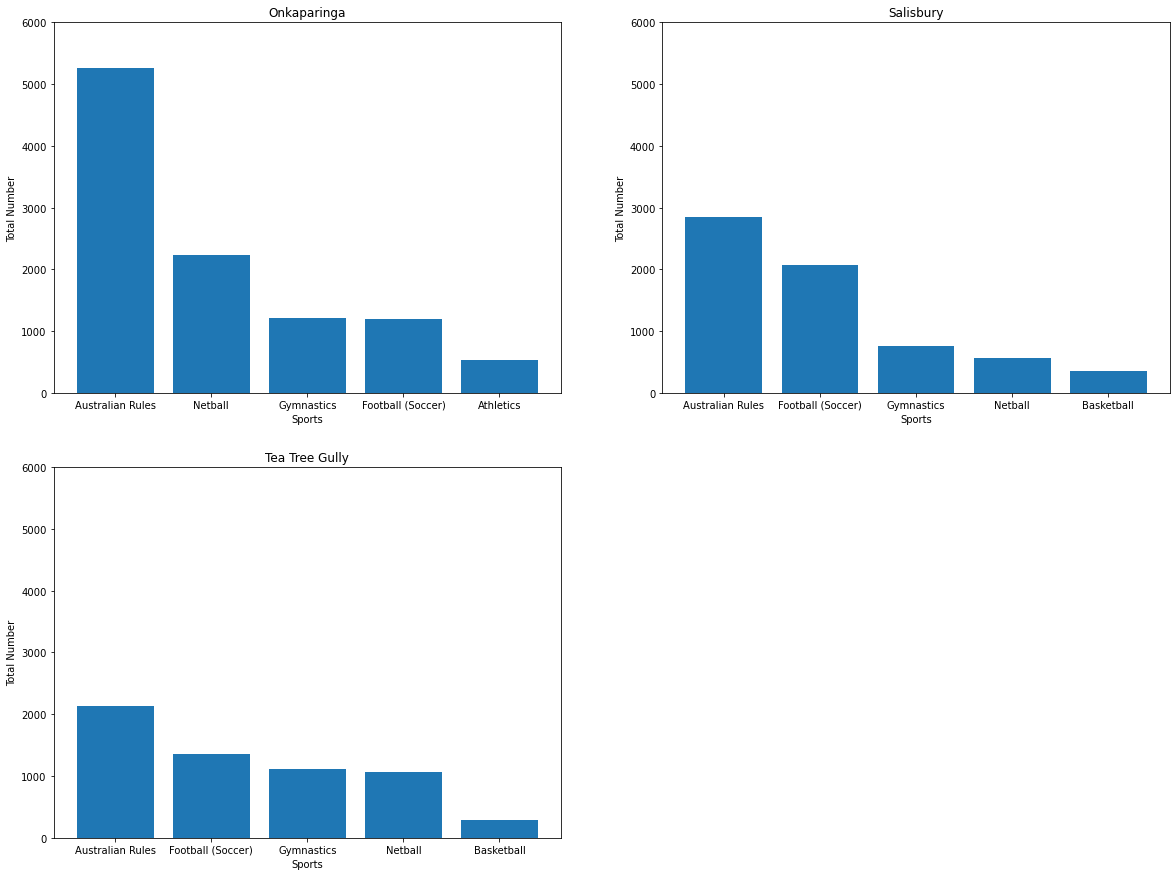

In [66]:
# Plot the first five most popular sports using vouchers in three LGAs
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.ylim(0,6000)
plt.title("Onkaparinga")
plt.xlabel("Sports")
plt.ylabel("Total Number")
plt.bar(df_first_lga['sports'], df_first_lga['counts'])
plt.subplot(2,2,2)
plt.ylim(0,6000)
plt.title("Salisbury")
plt.xlabel("Sports")
plt.ylabel("Total Number")
plt.bar(df_second_lga['sports'], df_second_lga['counts'])
plt.subplot(2,2,3)
plt.ylim(0,6000)
plt.title("Tea Tree Gully")
plt.xlabel("Sports")
plt.ylabel("Total Number")
plt.bar(df_third_lga['sports'], df_third_lga['counts'])

* **_Interpretation about The Summarised Results:_**
Australian Rules is the most standout sport which is undertaken using the sport vouchers in the three LGAs, which is similar to the most standout sport in all LGAs. Football(Soccer) ranks second in the five most popular sport using vouchers in Salisbury and Tea Tree Gully. By contrast, Football(Soccer) is the fourth popular sport undertaken by participants who reside in Onkaparinga. Gymnastics ranks third in all three LGAs. While Netball is the second popular sport in Onkaparinga, it ranks fourth in both Salisbury and Tea Tree Gully. The least popular in the five most standout activities in Onkaparinga is Athletics, while in both Salisbury and Tea Tree Gully are Basketball.

### Popularity of Sports across Different Parts of The State

In [67]:
# Dataframe includes the LGA and sports
lga_sport

,Participant_LGA,Voucher_Sport
0,ONKAPARINGA,Australian Rules
1,ONKAPARINGA,Australian Rules
2,ONKAPARINGA,Gymnastics
3,ONKAPARINGA,Gymnastics
4,ONKAPARINGA,Gymnastics
...,...,...
127521,MID MURRAY,Netball
127522,MID MURRAY,Netball
127523,MID MURRAY,Netball
127524,MID MURRAY,Netball


In [99]:
# group the dataset based on LGA and Sport, then count the total participants in each activity
lga_group = lga_sport.groupby([ 'Voucher_Sport', 'Participant_LGA']).size()
lga_group

Voucher_Sport  Participant_LGA
Archery        ADELAIDE HILLS      3
               ALEXANDRINA         9
               BURNSIDE            2
               CHARLES STURT       1
               HOLDFAST BAY        1
                                  ..
Weightlifting  MARION              2
               MITCHAM             2
Wrestling      CHARLES STURT       1
               MARION              3
               ONKAPARINGA        15
Length: 1157, dtype: int64

In [100]:
# turn the "groupby" dataset into a dataframe
lga_group = lga_group.unstack(level=0)
lga_group

Voucher_Sport,Archery,Athletics,Australian Rules,BMX,Badminton,Baseball,Basketball,Bowls,Calisthenics,Cricket,...,Surf Riding,Swimming,Table Tennis,Taekwondo,Tennis,Touch,Volleyball,Water Polo,Weightlifting,Wrestling
Participant_LGA,,,,,,,,,,,,,,,,,,,,,
ADELAIDE,NaN,16.0,130.0,NaN,NaN,1.0,4.0,NaN,1.0,2.0,...,NaN,NaN,NaN,11.0,4.0,NaN,NaN,NaN,NaN,NaN
ADELAIDE HILLS,3.0,204.0,1412.0,2.0,NaN,11.0,48.0,NaN,62.0,128.0,...,NaN,18.0,3.0,44.0,257.0,2.0,1.0,1.0,NaN,NaN
ADELAIDE PLAINS,NaN,3.0,485.0,NaN,NaN,3.0,15.0,NaN,23.0,3.0,...,NaN,3.0,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN
ALEXANDRINA,9.0,62.0,980.0,4.0,3.0,NaN,204.0,NaN,5.0,8.0,...,2.0,11.0,NaN,NaN,109.0,NaN,NaN,NaN,NaN,NaN
BAROSSA,NaN,158.0,1196.0,3.0,NaN,6.0,341.0,NaN,9.0,56.0,...,NaN,12.0,NaN,NaN,83.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WEST TORRENS,1.0,114.0,907.0,2.0,NaN,12.0,70.0,NaN,45.0,85.0,...,NaN,80.0,4.0,27.0,158.0,1.0,4.0,2.0,NaN,NaN
WHYALLA,NaN,15.0,569.0,NaN,NaN,NaN,605.0,NaN,15.0,12.0,...,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WUDINNA,NaN,29.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
# Fill all the NaN value to 0
lga_group.fillna(0)

Voucher_Sport,Archery,Athletics,Australian Rules,BMX,Badminton,Baseball,Basketball,Bowls,Calisthenics,Cricket,...,Surf Riding,Swimming,Table Tennis,Taekwondo,Tennis,Touch,Volleyball,Water Polo,Weightlifting,Wrestling
Participant_LGA,,,,,,,,,,,,,,,,,,,,,
ADELAIDE,0.0,16.0,130.0,0.0,0.0,1.0,4.0,0.0,1.0,2.0,...,0.0,0.0,0.0,11.0,4.0,0.0,0.0,0.0,0.0,0.0
ADELAIDE HILLS,3.0,204.0,1412.0,2.0,0.0,11.0,48.0,0.0,62.0,128.0,...,0.0,18.0,3.0,44.0,257.0,2.0,1.0,1.0,0.0,0.0
ADELAIDE PLAINS,0.0,3.0,485.0,0.0,0.0,3.0,15.0,0.0,23.0,3.0,...,0.0,3.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0
ALEXANDRINA,9.0,62.0,980.0,4.0,3.0,0.0,204.0,0.0,5.0,8.0,...,2.0,11.0,0.0,0.0,109.0,0.0,0.0,0.0,0.0,0.0
BAROSSA,0.0,158.0,1196.0,3.0,0.0,6.0,341.0,0.0,9.0,56.0,...,0.0,12.0,0.0,0.0,83.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WEST TORRENS,1.0,114.0,907.0,2.0,0.0,12.0,70.0,0.0,45.0,85.0,...,0.0,80.0,4.0,27.0,158.0,1.0,4.0,2.0,0.0,0.0
WHYALLA,0.0,15.0,569.0,0.0,0.0,0.0,605.0,0.0,15.0,12.0,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
WUDINNA,0.0,29.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* **_Comment:_** 

Since any NaN value in any LGA means there is no record for this LGA with the specific sport, filling with 0 is probably the suitable method in this case -- There is no participant in those "NaN value" sports in specific regions/LGAs.

* **_Plot Heatmap for all the sports with LGAs:_**

As there are up to 69 different LGAs involved in the dataset, we separately plot three heatmaps for the dataset (each separate plot contains 23 LGAs). Then, we can compare and evaluate the distribution of sport vouchers across all regions easily.

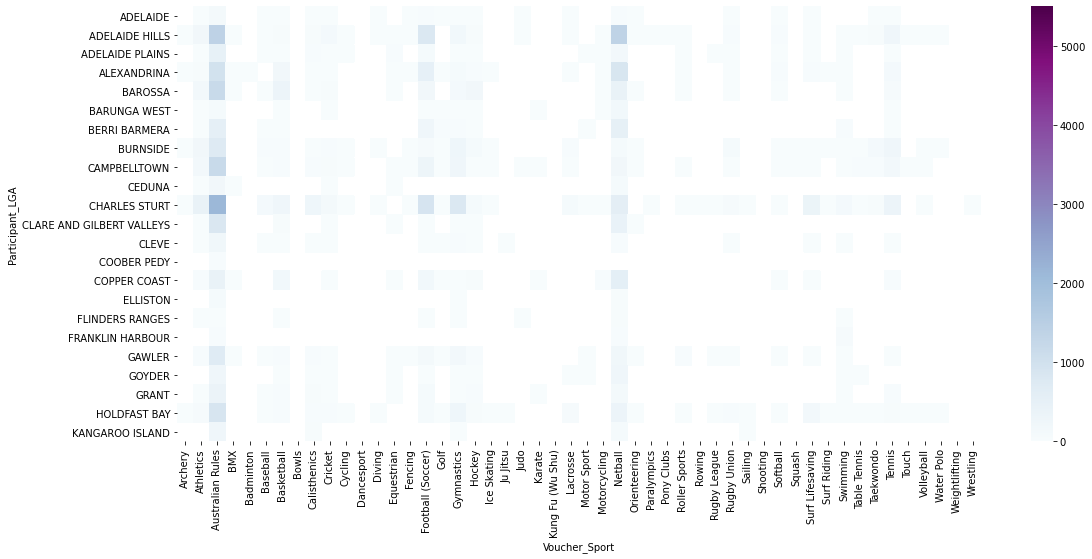

In [147]:
fig, ax = plt.subplots(figsize=(18, 8))
sns.heatmap(lga_group[:23], cmap="BuPu", vmin = 0, vmax= 5500)
plt.show()

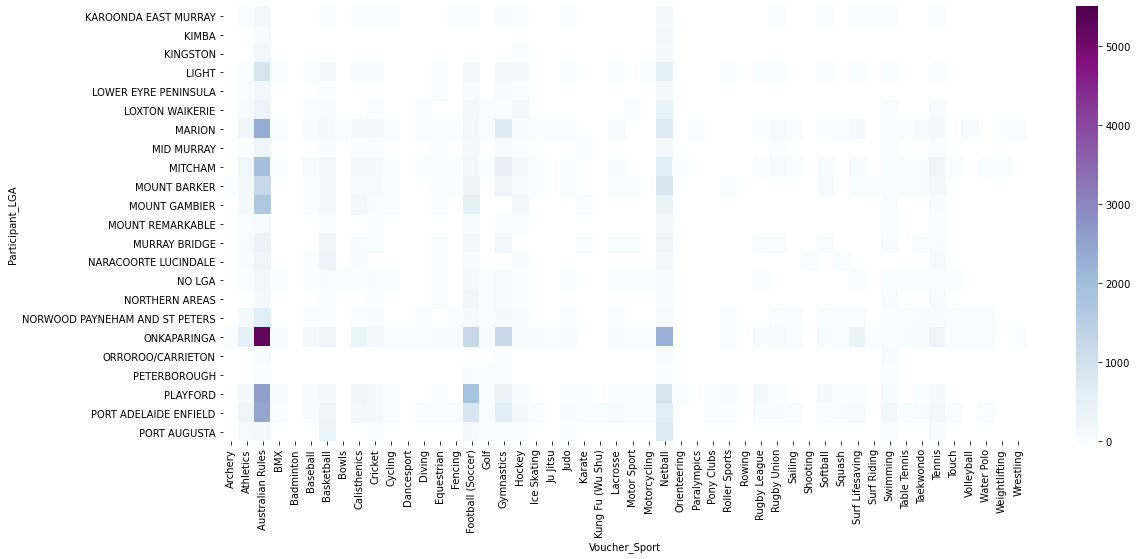

In [148]:
fig, ax = plt.subplots(figsize=(18, 8))
sns.heatmap(lga_group[23:46], cmap="BuPu", vmin = 0, vmax= 5500)
plt.show()

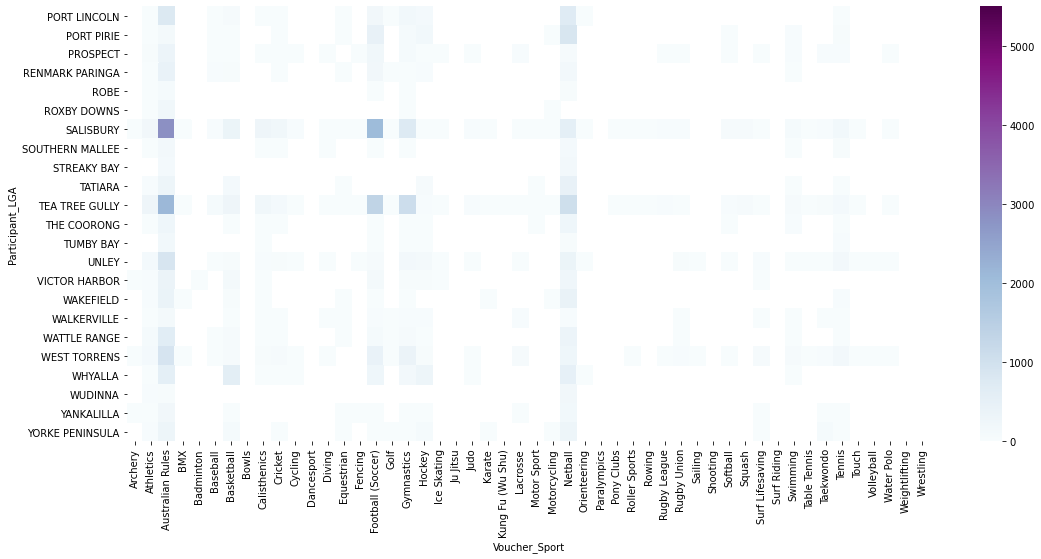

In [149]:
fig, ax = plt.subplots(figsize=(18, 8))
sns.heatmap(lga_group[46:], cmap="BuPu", vmin = 0, vmax= 5500)
plt.show()

## Challenge - Queensland

_Note: this is an extra task that you might take on to get a better grade for your portfolio.  You can get a good pass grade without doing this._ 

Queensland has a similar program called [Get Started](https://data.gov.au/dataset/ds-qld-3118838a-d425-48fa-bfc9-bc615ddae44e/details?q=get%20started%20vouchers) and we can retrieve data from their program in a similar format.  

The file [round1-redeemed_get_started_vouchers.csv](files/round1-redeemed_get_started_vouchers.csv) contains records of the vouchers issued in Queensland. The date of this data is not included but the program started in 2015 so it is probably from around then.  

The data includes the LGA of the individual but the name of the activity is slightly different.  To do a comparable analysis you would need to map the activity names onto those from South Australia. 

In [6]:
qld_vouchers = pd.read_csv('files/round1-redeemed_get_started_vouchers.csv')
qld_vouchers.head()

,Application Number,Voucher Number,Child Age (at time of Application),Gender,Has your child played sport before?,Participation Activity,Club Name,Club Suburb/Town,Club Local Government Area Name,Club State Electoral District Name,Parent Suburb/Town,Total Payment
0,2000012253,Q89QDUXP,10,NaN,Yes,*Other,Queensland Police-Citizens Youth Welfare Assoc...,Airlie Beach,Whitsunday (R),Whitsunday,Jubilee Pocket,60.01
1,2000001727,593F6Y41,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Leichhardt,150.00
2,2000013464,PH2R4RTT,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Woodridge,150.00
3,2000009270,035SE2H5,5,NaN,Yes,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Yatala,150.00
4,2000007273,NP6C4729,6,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Alexandra Hills,150.00


In [7]:
# Join the QLD data with the LGA data as before to get population and SIEFA data integrated
qld_vouchers['LGA'] = qld_vouchers['Club Local Government Area Name'].str.replace(' \([RC]+\)', '').str.upper()
qld_vouchers_scores = qld_vouchers.join(LGA_scores, on='LGA')
qld_vouchers_scores.head()

<ipython-input-7-d688531e2bfc>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  qld_vouchers['LGA'] = qld_vouchers['Club Local Government Area Name'].str.replace(' \([RC]+\)', '').str.upper()


,Application Number,Voucher Number,Child Age (at time of Application),Gender,Has your child played sport before?,Participation Activity,Club Name,Club Suburb/Town,Club Local Government Area Name,Club State Electoral District Name,Parent Suburb/Town,Total Payment,LGA,IEO,IER,IRSAD,IRSD,Population
0,2000012253,Q89QDUXP,10,NaN,Yes,*Other,Queensland Police-Citizens Youth Welfare Assoc...,Airlie Beach,Whitsunday (R),Whitsunday,Jubilee Pocket,60.01,WHITSUNDAY,989.0,989.0,966.0,982.0,31393.0
1,2000001727,593F6Y41,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Leichhardt,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0
2,2000013464,PH2R4RTT,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Woodridge,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0
3,2000009270,035SE2H5,5,NaN,Yes,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Yatala,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0
4,2000007273,NP6C4729,6,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Alexandra Hills,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0
